# Frame Classification using ResNet + Transformer with data augmentation

This notebook creates and trains an Transformer based classifier with a dataset, where data augmentation was applied, build arround feature vectors of dimension 512.

In [1]:
from utils2 import *
import os
import pandas as pd

%load_ext autoreload
%autoreload 2

In [3]:
from Transformer import *

model = get_model((300,512), 300, num_heads=16)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ frame_position_embedding        │ (None, 300, 512)       │           300 │
│ (PositionalEmbedding)           │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_layer               │ (None, 300, 512)       │     1,054,209 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 300, 1)         │           513 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,055,022 (4.02 MB)

 Trainable params: 1,055,022 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

## Train models

We will use the best configuration we found with our wandb project

In [2]:
best_config = {
    'abs_path': '../', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'transformer',
    'dropout_rate': 0.5,
    'num_layers': 1,
    'num_units': 256,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 32,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'model_name' : 'trans_512',
    'norm' : False,
    'num_heads' : 16
}

## Final model Training & Evaluation

(709, 300, 512) (709, 300, 2)
(122, 300, 512) (122, 300, 2)
Running experiment for Grooming
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5900 - fn: 5641.1304 - fp: 42839.4766 - loss: 1.3735 - prc: 0.1038 - precision: 0.1062 - recall: 0.4604 - tn: 60832.8711 - tp: 5534.3477
Epoch 1: val_loss improved from inf to 0.86110, saving model to trans_512_grooming.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.5892 - fn: 5833.1665 - fp: 44438.6250 - loss: 1.3624 - prc: 0.1047 - precision: 0.1071 - recall: 0.4637 - tn: 62848.1680 - tp: 5805.0415 - val_accuracy: 0.4391 - val_fn: 44.0000 - val_fp: 20486.0000 - val_loss: 0.8611 - val_prc: 0.3448 - val_precision: 0.1462 - val_recall: 0.9876 - val_tn: 12563.0000 - val_tp: 3507.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5962 - fn: 3538.2173 - fp: 39788.4766 - loss: 0.6888 - prc: 0.1988 - precision: 0.1464 - recall: 0.6977 - tn: 63916.3047 - tp: 7604.8262
Epoch 2: val_loss improved from 0.86110 to 0

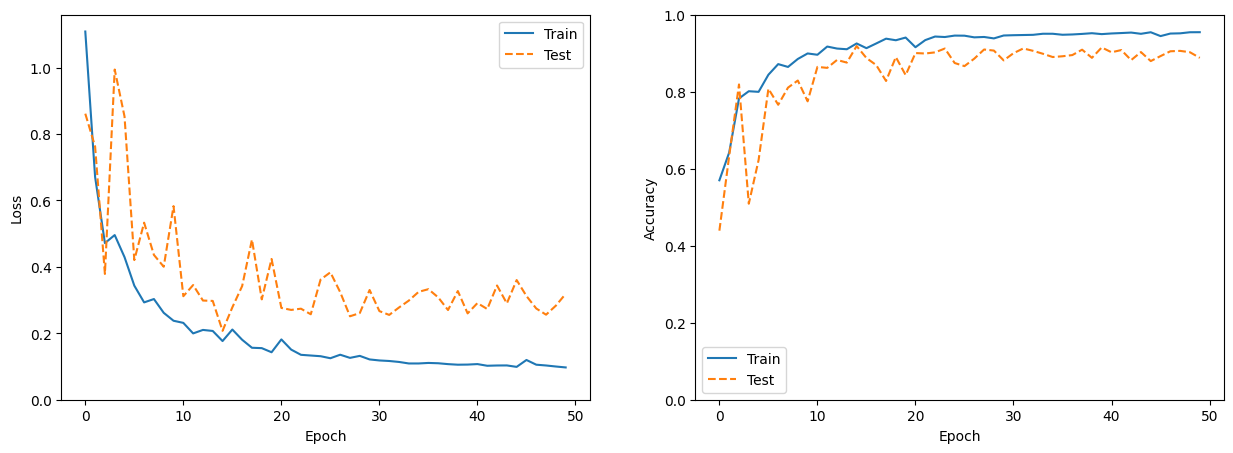

23/23 ━━━━━━━━━━━━━━━━━━━━ 29s 850ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step 


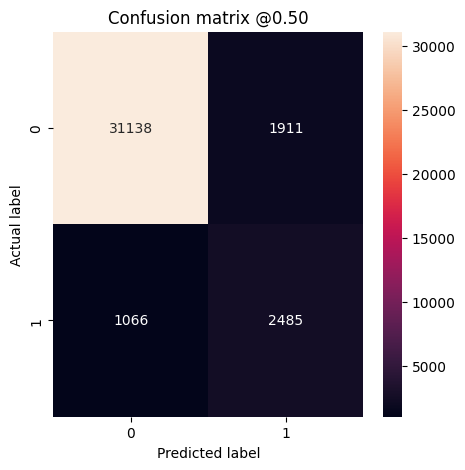

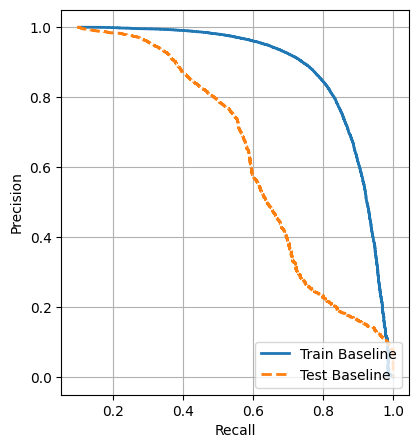

/Users/saraalbarran/Documents/SARA/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:404: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Running experiment for Rearing
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5071 - fn: 12443.8691 - fp: 44495.8711 - loss: 1.3392 - prc: 0.2358 - precision: 0.2305 - recall: 0.5201 - tn: 44416.7383 - tp: 13491.3477
Epoch 1: val_loss improved from inf to 0.79354, saving model to trans_512_rearing.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 161s 6s/step - accuracy: 0.5073 - fn: 12896.7500 - fp: 46013.6250 - loss: 1.3297 - prc: 0.2357 - precision: 0.2306 - recall: 0.5198 - tn: 46065.0430 - tp: 13949.5830 - val_accuracy: 0.4299 - val_fn: 1106.0000 - val_fp: 19760.0000 - val_loss: 0.7935 - val_prc: 0.1216 - val_precision: 0.1159 - val_recall: 0.7008 - val_tn: 13143.0000 - val_tp: 2591.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5107 - fn: 11100.3047 - fp: 44002.3477 - loss: 0.8028 - prc: 0.2569 - precision: 0.2511 - recall: 0.5851 - tn: 44876.0859 - tp: 14869.0869
Epoch 2: val_loss improved from 0.79354 to 0.59401, saving model to trans_512_rearing.keras
23/23

In [ ]:
metrics = train_test_model(best_config)

(709, 300, 512) (709, 300, 2)
(122, 300, 512) (122, 300, 2)
Running experiment for Rearing
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5125 - fn: 13439.6523 - fp: 43683.5234 - loss: 1.4487 - prc: 0.2204 - precision: 0.2200 - recall: 0.4622 - tn: 45209.3047 - tp: 12515.3477
Epoch 1: val_loss improved from inf to 0.77970, saving model to trans_512_rearing.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5123 - fn: 13909.7920 - fp: 45187.2500 - loss: 1.4368 - prc: 0.2205 - precision: 0.2202 - recall: 0.4631 - tn: 46872.4570 - tp: 12955.5000 - val_accuracy: 0.4213 - val_fn: 1245.0000 - val_fp: 19937.0000 - val_loss: 0.7797 - val_prc: 0.1254 - val_precision: 0.1095 - val_recall: 0.6632 - val_tn: 12966.0000 - val_tp: 2452.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4930 - fn: 11586.2178 - fp: 46202.9141 - loss: 0.8100 - prc: 0.2384 - precision: 0.2369 - recall: 0.5641 - tn: 42745.3047 - tp: 14313.3916
Epoch 2: val_loss improved from 0.7797

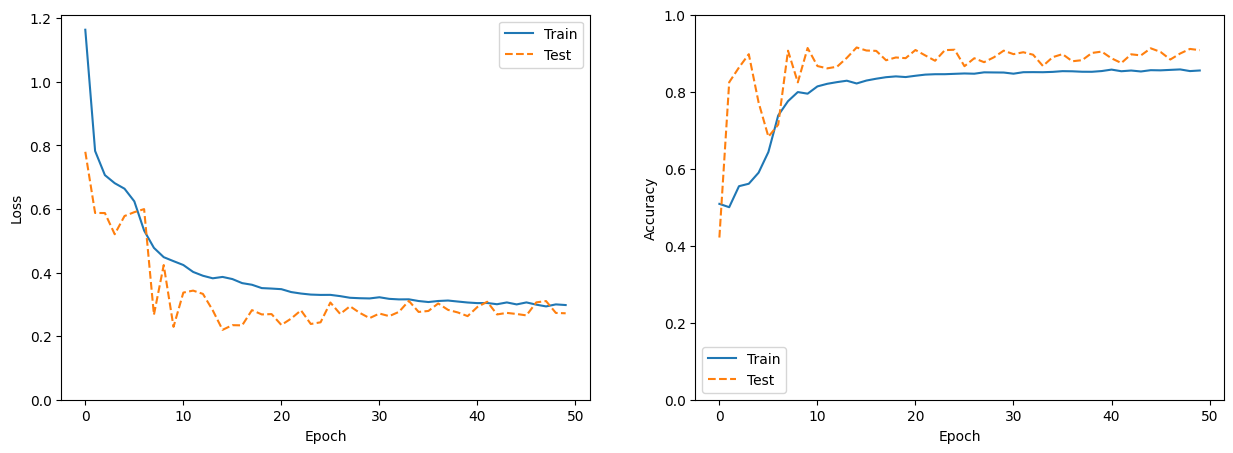

23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 648ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step 


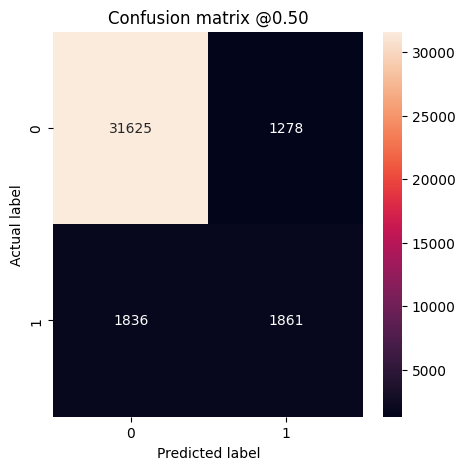

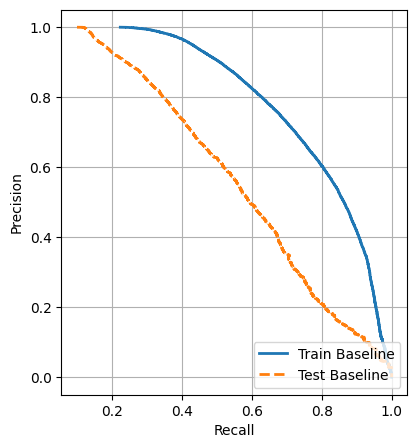

/Users/saraalbarran/Documents/SARA/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:404: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([


In [3]:
metrics = train_test_model(best_config)

## Evaluate model

On the following section we will evaluate the model on the validation set. 

In [4]:
from evaluation_utils import *
import keras
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load validation data
path = '../data/processed/Dataset/'
val_data = load_dataset(path, 'resnet')
print('Validation videos: ', val_data.keys())

# Per each video, generate sequences
val_seq = {}
for i in list(val_data.keys()):
    X, Y = generate_sequences(val_data[i], 300)
    val_seq[i] = [X, Y]

behaviours = ['Grooming', 'Rearing']

# We will load the models
if 'Grooming' in behaviours:
    model_grooming = keras.models.load_model('trans_512_grooming.keras', compile=True)
if 'Rearing' in behaviours:
    model_rearing = keras.models.load_model('trans_512_rearing.keras', compile=True)

# Create 2 dataframes to store metrics for each behaviour
metrics_g = pd.DataFrame(columns=['Accuracy', 'Precission', 'Recall', 'PRC'], index=list(val_data.keys()))
metrics_r = pd.DataFrame(columns=['Accuracy', 'Precission','Recall', 'PRC'], index=list(val_data.keys()))

Validation videos:  dict_keys(['1', 'Animal62418', 'HD_ChR2_480A'])


In [14]:
metrics_g

,Accuracy,Precission,Recall,PRC
1,0.995128,0.969697,0.857143,0.938735
Animal62418,0.958254,0.882353,0.29661,0.691109
HD_ChR2_480A,0.935073,0.884615,0.778818,0.901609


In [15]:
metrics_r

,Accuracy,Precission,Recall,PRC
1,0.981795,0.588235,0.135135,0.283821
Animal62418,0.873333,0.566812,0.68244,0.685473
HD_ChR2_480A,0.887971,0.718679,0.545376,0.692763


### Results video 1.mp4

In [8]:
X, Y = val_seq['1']

# Append metrics to dataset
metrics_g.loc['1'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['1'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.9951 - fn: 16.0000 - fp: 3.0000 - loss: 0.0254 - prc: 0.9387 - precision: 0.9697 - recall: 0.8571 - tn: 3785.0000 - tp: 96.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9818 - fn: 64.0000 - fp: 7.0000 - loss: 0.0735 - prc: 0.2838 - precision: 0.5882 - recall: 0.1351 - tn: 3819.0000 - tp: 10.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


We will start by plotting the labels and actual predictions along the video frames.


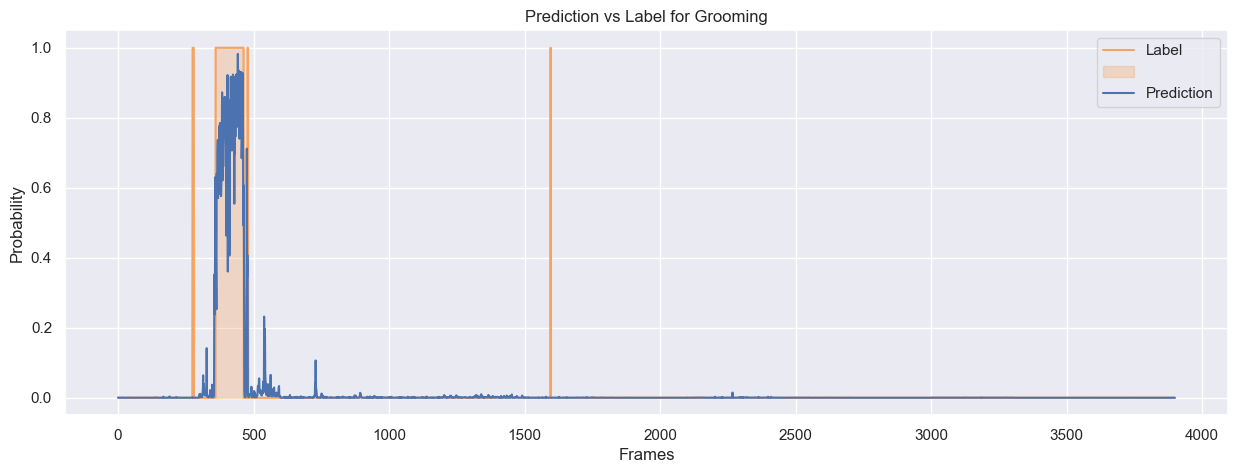

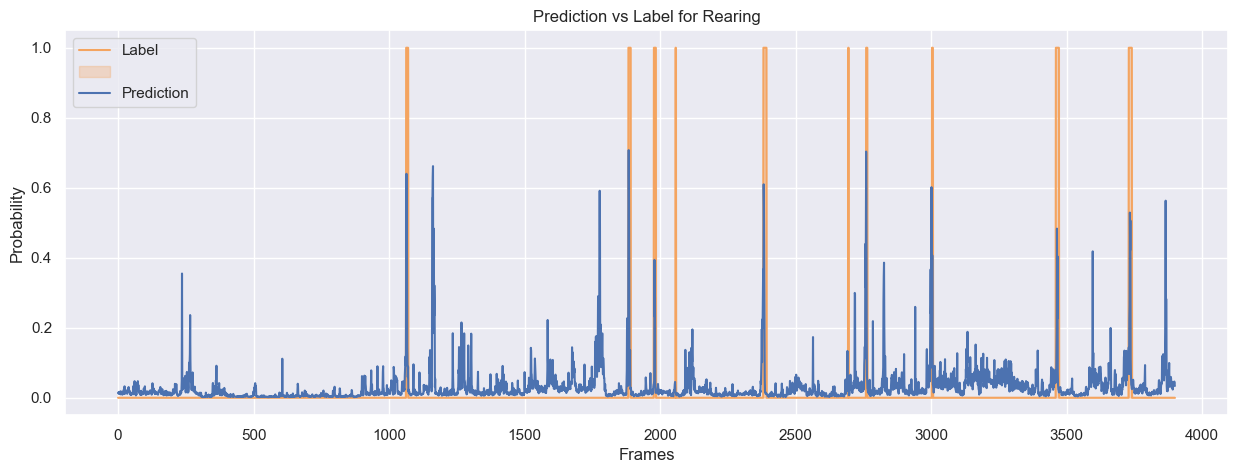

We will compute the PRC curve to choose the best threshold.


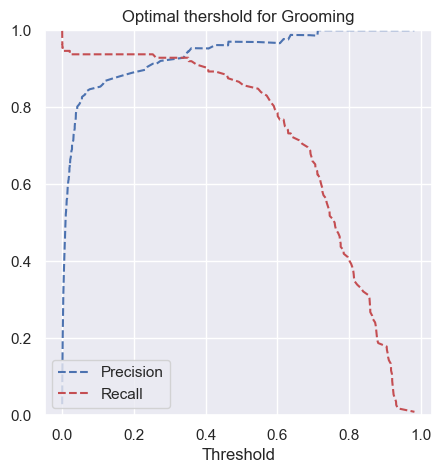

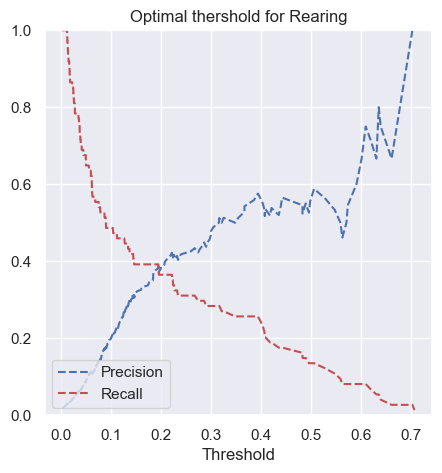

Lastly we will plot the confussion matrix for each behaviour


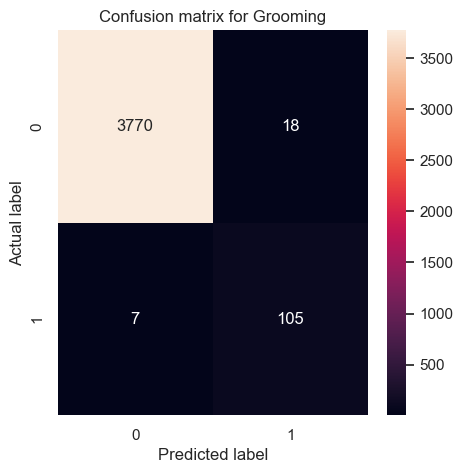

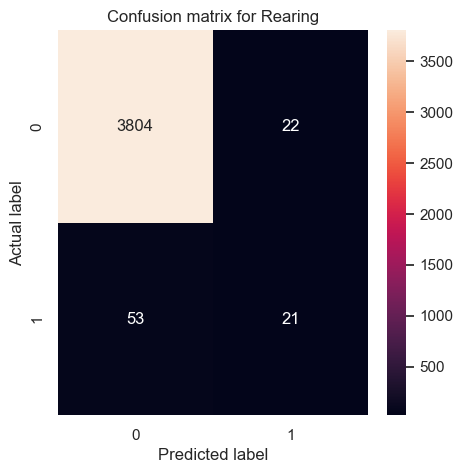

In [9]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.1)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.3)

### Results video Animal62418.mp4

In [10]:
X, Y = val_seq['Animal62418']

# Append metrics to dataset
metrics_g.loc['Animal62418'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['Animal62418'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9583 - fn: 249.0000 - fp: 14.0000 - loss: 0.1181 - prc: 0.6911 - precision: 0.8824 - recall: 0.2966 - tn: 5932.0000 - tp: 105.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8733 - fn: 302.0000 - fp: 496.0000 - loss: 0.3256 - prc: 0.6855 - precision: 0.5668 - recall: 0.6824 - tn: 4853.0000 - tp: 649.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


We will start by plotting the labels and actual predictions along the video frames.


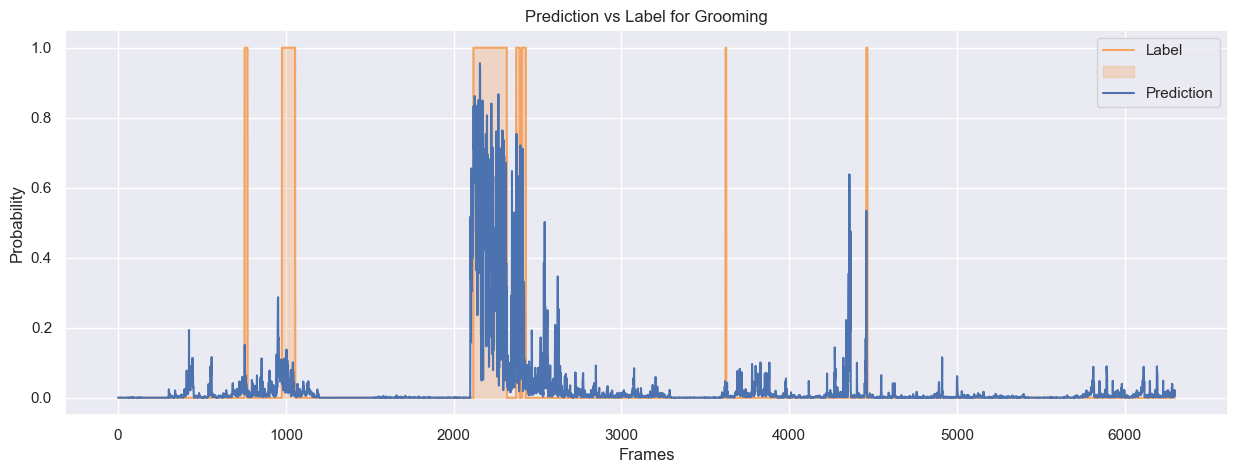

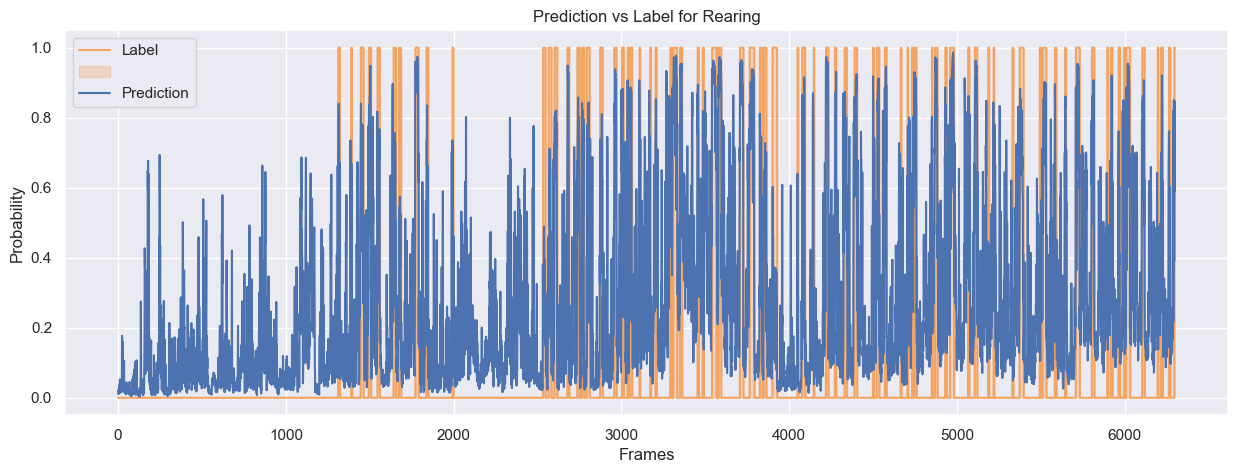

We will compute the PRC curve to choose the best threshold.


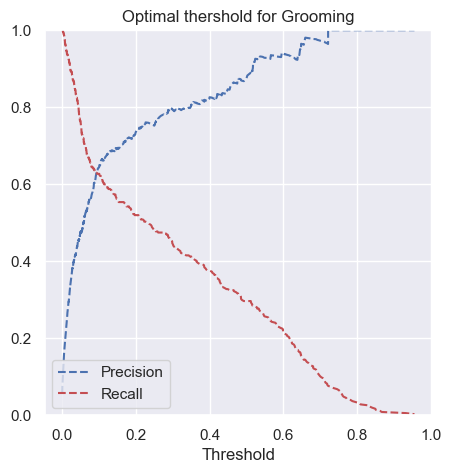

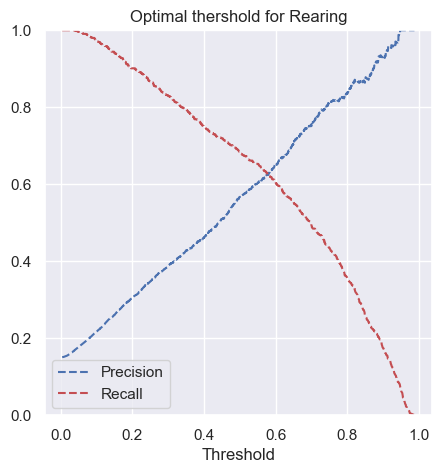

Lastly we will plot the confussion matrix for each behaviour


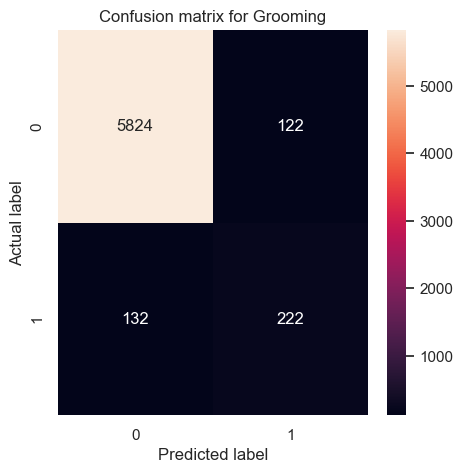

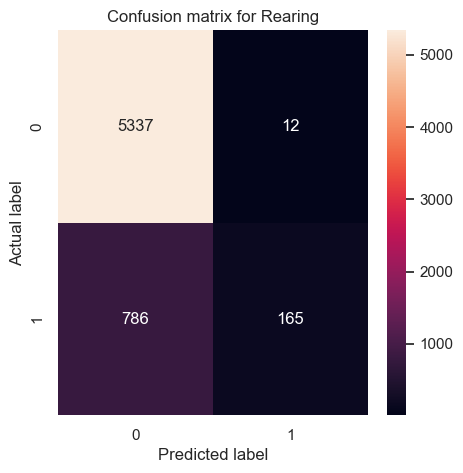

In [11]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.1)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.9)

### Results video HD_ChR2_480A.mp4

In [12]:
X, Y = val_seq['HD_ChR2_480A']

# Append metrics to dataset
metrics_g.loc['HD_ChR2_480A'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['HD_ChR2_480A'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9351 - fn: 307.0000 - fp: 141.0000 - loss: 0.1801 - prc: 0.9016 - precision: 0.8846 - recall: 0.7788 - tn: 5371.0000 - tp: 1081.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8880 - fn: 526.0000 - fp: 247.0000 - loss: 0.2888 - prc: 0.6928 - precision: 0.7187 - recall: 0.5454 - tn: 5496.0000 - tp: 631.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


We will start by plotting the labels and actual predictions along the video frames.


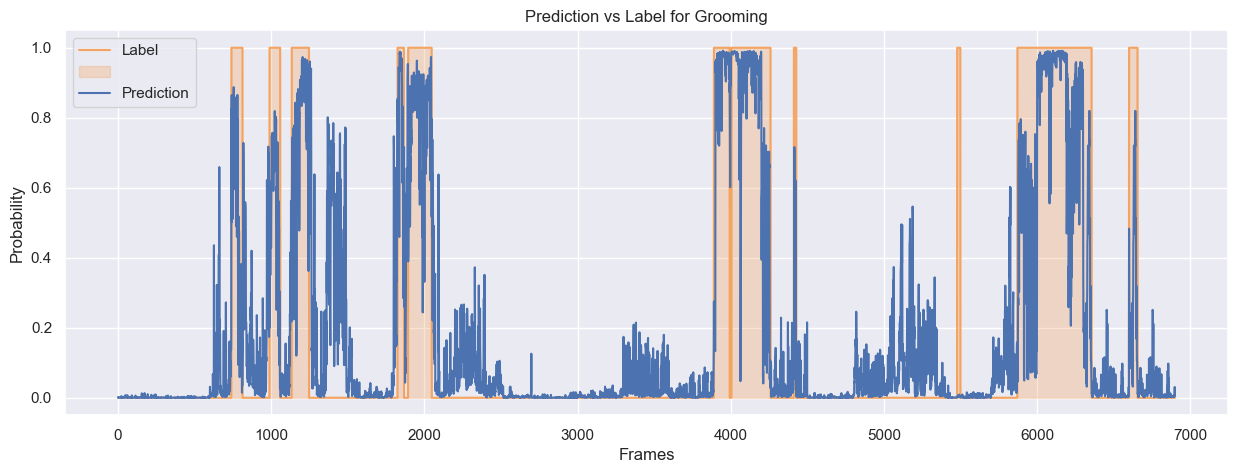

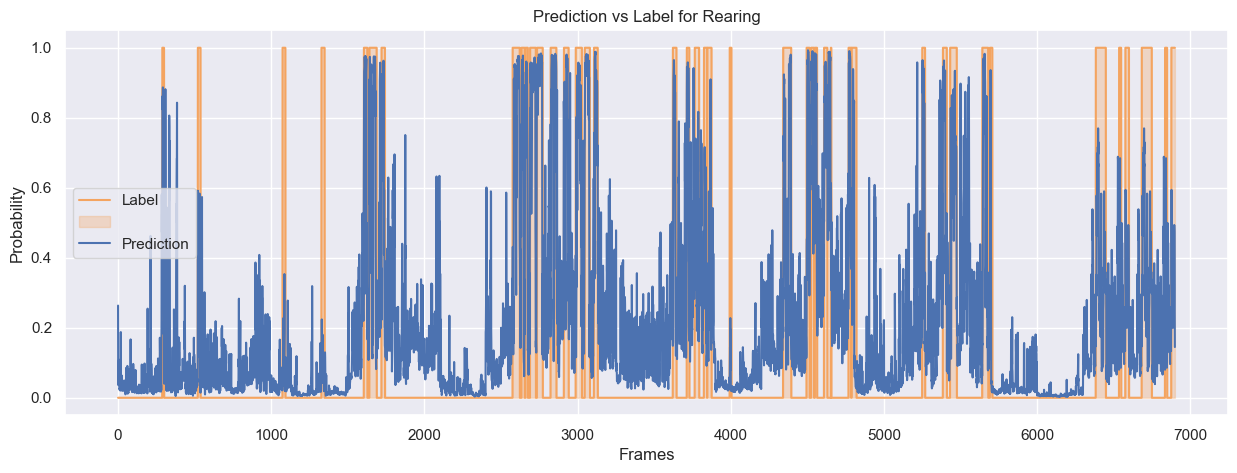

We will compute the PRC curve to choose the best threshold.


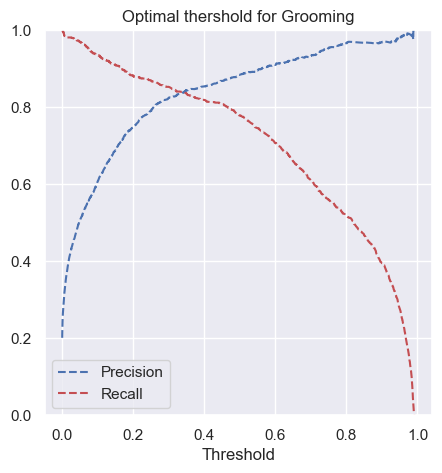

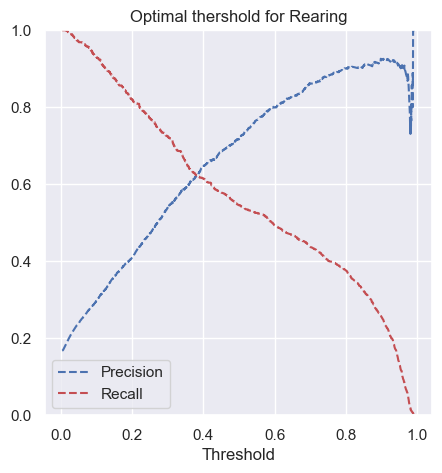

Lastly we will plot the confussion matrix for each behaviour


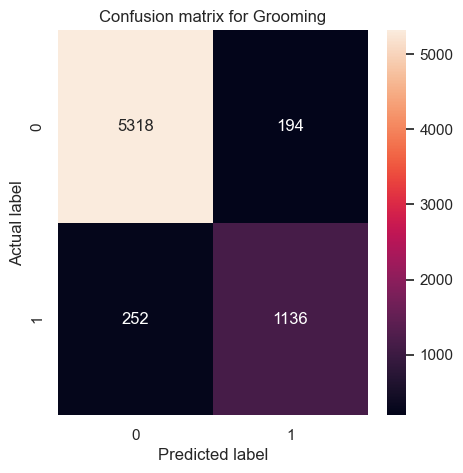

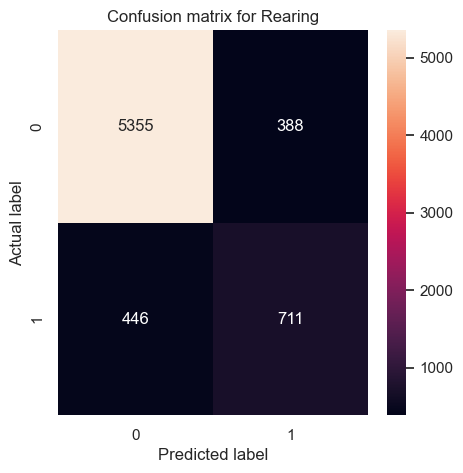

In [13]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.4)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.4)